In [2]:
%matplotlib inline
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
from scipy.stats import poisson
import matplotlib.patches as mpatches
from functools import partial
import pickle
import os
import demixing as dm
from demixing import MLP, HiddenLayer

nneuron = 61
min_angle = -90
max_angle = 90
sprefs = np.linspace(min_angle, max_angle, nneuron)
eps = np.finfo(np.float64).eps
sigtc_sq = float(10**2)

In [3]:
lin_corrs = np.zeros(400)
full_corrs = np.zeros(400)
sum_corrs = np.zeros(400)
low_mses = []
good_mses = []

for i in range(1, 400):
    file_name = 'output_readout/readout_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        ro = pickle.load(pkl_file)
        lin_preds, lin_corr, full_preds, full_corr, sum_preds, sum_corr, valid_mse_lin, valid_mse_full = ro
        lin_corrs[i-1] = lin_corr[0, 1]
        full_corrs[i-1] = full_corr[0, 1]
        sum_corrs[i-1] = sum_corr[0, 1]
        if lin_corrs[i-1] < .7:
            low_mses.append(valid_mse_lin)
        else:
            good_mses.append(valid_mse_lin)

In [20]:
good_mses

[array([ 0.01479837,  0.0131818 ,  0.01076705,  0.010082  ,  0.00958669,
         0.00896004,  0.00456083,  0.00367813,  0.00318805,  0.00290464,
         0.00271368,  0.00258255,  0.00249253,  0.00242892,  0.0023837 ,
         0.00234987,  0.00232415,  0.00230388,  0.00228736,  0.00227395,
         0.00226274,  0.00225332,  0.00224537,  0.00223817,  0.00223182,
         0.00222623,  0.00222127,  0.00221675,  0.00221271,  0.00220899,
         0.00220567,  0.00220265,  0.00219993,  0.00219721,  0.00219495,
         0.00219291,  0.00219096,  0.00218913,  0.00218734,  0.00218592,
         0.00218463,  0.00218345,  0.00218241,  0.00218146,  0.0021805 ,
         0.00217971,  0.00217896,  0.00217816,  0.00217753,  0.00217693,
         0.00217639,  0.00217593,  0.00217546,  0.00217508,  0.00217473,
         0.00217434,  0.00217402,  0.00217365,  0.00217338,  0.00217312,
         0.00217287,  0.00217265,  0.00217245,  0.00217226,  0.00217209,
         0.00217195,  0.00217181,  0.00217154,  0.0

In [3]:
valid_mses = np.zeros(400)
for i in range(400):
    file_name = 'output_nn_tests_2/nn_tests_2_' + str(i) + '.pkl'
    #file_name = 'output_nn_runs_2/nn_runs_2_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        valid_mses[i] = valid_mse[99]
valid_mses = valid_mses[1:400]
lin_corrs = lin_corrs[0:399]

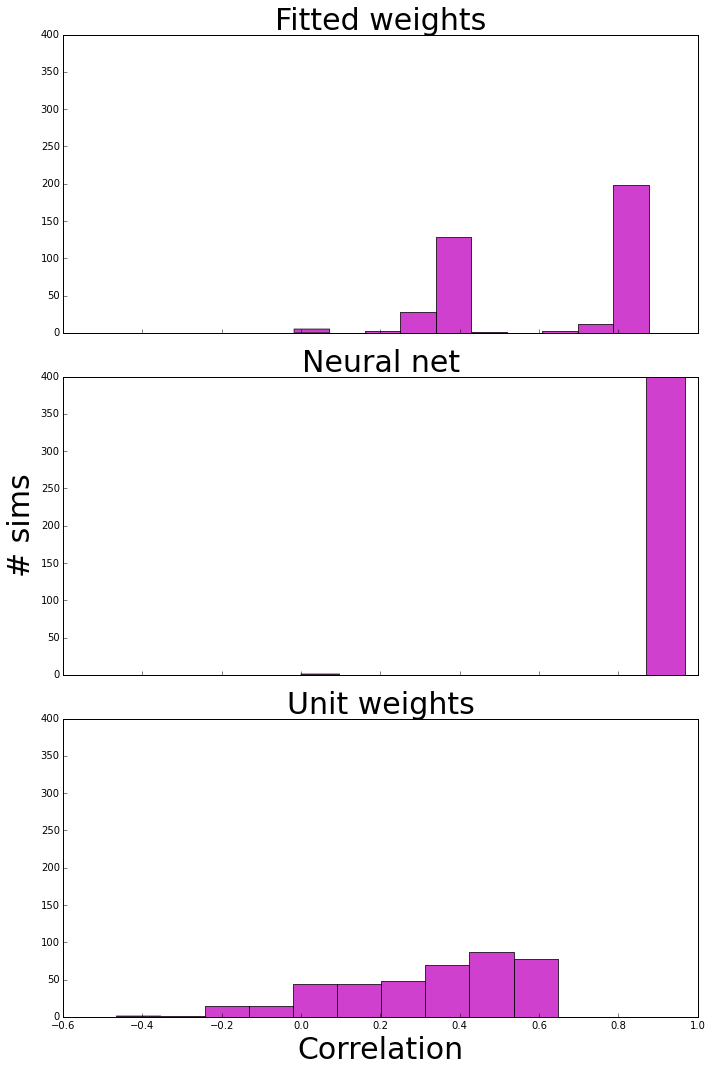

In [7]:
f, ax = plt.subplots(3, sharex=True, sharey=True)
ax[0].hist(lin_corrs[~np.isnan(lin_corrs)], 10, facecolor='m', alpha=0.75)
ax[1].hist(full_corrs[~np.isnan(full_corrs)], 10, facecolor='m', alpha=0.75)
ax[2].hist(sum_corrs[~np.isnan(sum_corrs)], 10, facecolor='m', alpha=0.75)
ax[1].set_ylabel('# sims', fontsize=30)
ax[2].set_xlabel('Correlation', fontsize=30)
ax[0].yaxis.set_ticks_position('left')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].set_title('Fitted weights', fontsize=30)
ax[1].yaxis.set_ticks_position('left')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].set_title('Neural net', fontsize=30)
ax[2].yaxis.set_ticks_position('left')
ax[2].xaxis.set_ticks_position('bottom')
ax[2].set_title('Unit weights', fontsize=30)
f.set_size_inches(10,15)
plt.tight_layout()

In [29]:
lin_corrs = np.zeros(400)
full_corrs = np.zeros(400)
sum_corrs = np.zeros(400)
kurt_corrs = np.zeros(400)
valid_mses = np.zeros(400)
low_mses = []
good_mses = []

for i in range(1, 400):
    file_name = 'output_readout_2/readout_2_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        ro = pickle.load(pkl_file)
        lin_preds, lin_corr, full_preds, full_corr, sum_preds, sum_corr, kurt_preds, kurt_corr, valid_mse, valid_mse_lin, valid_mse_full, vp = ro
        lin_corrs[i-1] = lin_corr[0, 1]
        full_corrs[i-1] = full_corr[0, 1]
        sum_corrs[i-1] = sum_corr[0, 1]
        kurt_corrs[i-1] = kurt_corr[0, 1]
        valid_mses[i-1] = valid_mse[99]
        if lin_corrs[i-1] < .7:
            low_mses.append(valid_mse_lin)
        else:
            good_mses.append(valid_mse_lin)

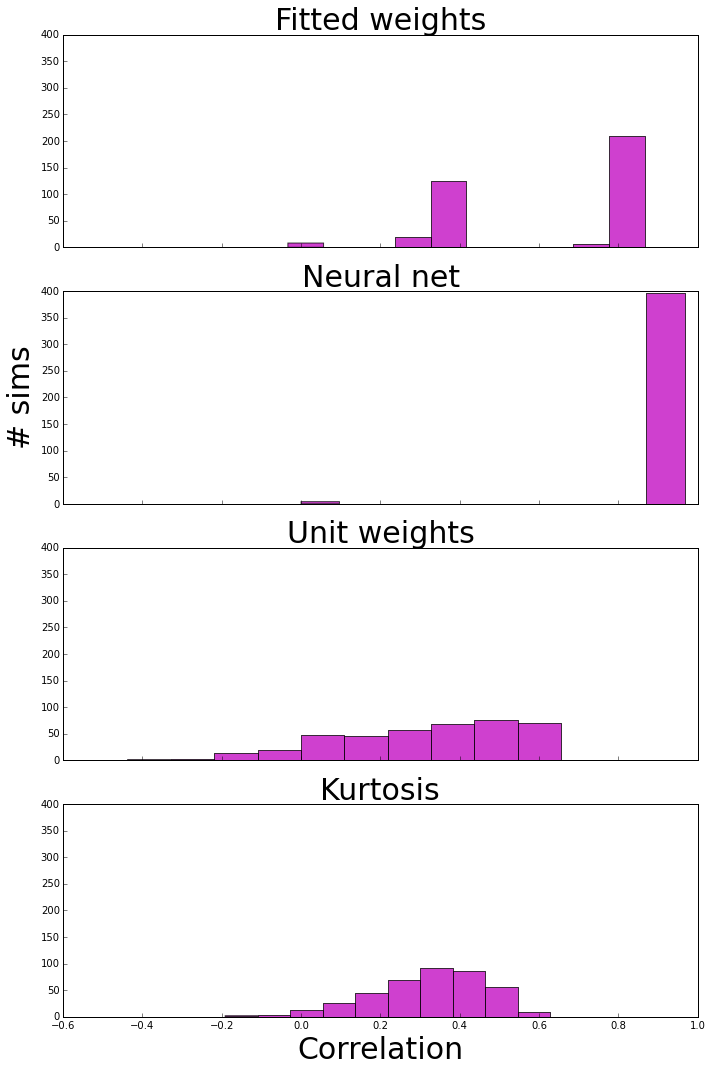

In [31]:
f, ax = plt.subplots(4, sharex=True, sharey=True)
ax[0].hist(lin_corrs[~np.isnan(lin_corrs)], 10, facecolor='m', alpha=0.75)
ax[1].hist(full_corrs[~np.isnan(full_corrs)], 10, facecolor='m', alpha=0.75)
ax[2].hist(sum_corrs[~np.isnan(sum_corrs)], 10, facecolor='m', alpha=0.75)
ax[3].hist(kurt_corrs[~np.isnan(sum_corrs)], 10, facecolor='m', alpha=0.75)
ax[1].set_ylabel('# sims', fontsize=30)
ax[3].set_xlabel('Correlation', fontsize=30)
ax[0].yaxis.set_ticks_position('left')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].set_title('Fitted weights', fontsize=30)
ax[1].yaxis.set_ticks_position('left')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].set_title('Neural net', fontsize=30)
ax[2].yaxis.set_ticks_position('left')
ax[2].xaxis.set_ticks_position('bottom')
ax[2].set_title('Unit weights', fontsize=30)
ax[3].yaxis.set_ticks_position('left')
ax[3].xaxis.set_ticks_position('bottom')
ax[3].set_title('Kurtosis', fontsize=30)
f.set_size_inches(10,15)
plt.tight_layout()

In [33]:
nn_lin_corrs = lin_corrs[~np.isnan(lin_corrs)]
nn_kurt_corrs = kurt_corrs[~np.isnan(lin_corrs)]
np.corrcoef(nn_lin_corrs, nn_kurt_corrs)

array([[ 1.        ,  0.05900841],
       [ 0.05900841,  1.        ]])

In [43]:
good_lin_corrs = lin_corrs[lin_corrs > .7]
good_kurt_corrs = kurt_corrs[lin_corrs > .7]
np.corrcoef(good_lin_corrs, good_kurt_corrs)

array([[  1.00000000e+00,   5.33915639e-04],
       [  5.33915639e-04,   1.00000000e+00]])

In [41]:
nn_lin_corrs = lin_corrs[~np.isnan(lin_corrs)]
nn_full_corrs = full_corrs[~np.isnan(lin_corrs)]
np.corrcoef(nn_lin_corrs, nn_full_corrs)

array([[ 1.        ,  0.27617795],
       [ 0.27617795,  1.        ]])

In [56]:
bad_lin_corrs = lin_corrs[(lin_corrs > 0) & (lin_corrs < .7)]
bad_full_corrs = full_corrs[(lin_corrs > 0) & (lin_corrs < .7)]
np.corrcoef(bad_lin_corrs, bad_full_corrs)

array([[ 1.        ,  0.03203294],
       [ 0.03203294,  1.        ]])

In [57]:
good_full_corrs = full_corrs[lin_corrs > .7]
np.corrcoef(good_lin_corrs, good_full_corrs)

array([[ 1.        ,  0.07521678],
       [ 0.07521678,  1.        ]])

In [58]:
bad_mses = valid_mses[(lin_corrs > 0) & (lin_corrs < .7)]
np.corrcoef(bad_lin_corrs, bad_mses)

array([[ 1.        ,  0.04400829],
       [ 0.04400829,  1.        ]])

In [60]:
good_mses = valid_mses[lin_corrs > .7]
np.corrcoef(good_lin_corrs, good_mses)

array([[ 1.        , -0.18819467],
       [-0.18819467,  1.        ]])

In [64]:
nn_lin_corrs = lin_corrs[~np.isnan(lin_corrs) & (lin_corrs > 0)]
nn_mses = valid_mses[~np.isnan(lin_corrs) & (lin_corrs > 0)]
np.corrcoef(nn_lin_corrs, nn_mses)

array([[ 1.        ,  0.03344938],
       [ 0.03344938,  1.        ]])

In [65]:
lin_corrs = np.zeros(400)
full_corrs = np.zeros(400)
sum_corrs = np.zeros(400)
kurt_corrs = np.zeros(400)
valid_mses = np.zeros(400)
low_mses = []
good_mses = []

for i in range(1, 400):
    file_name = 'output_readout_2_lr/readout_2_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        ro = pickle.load(pkl_file)
        lin_preds, lin_corr, full_preds, full_corr, sum_preds, sum_corr, kurt_preds, kurt_corr, valid_mse, valid_mse_lin, valid_mse_full, vp = ro
        lin_corrs[i-1] = lin_corr[0, 1]
        full_corrs[i-1] = full_corr[0, 1]
        sum_corrs[i-1] = sum_corr[0, 1]
        kurt_corrs[i-1] = kurt_corr[0, 1]
        valid_mses[i-1] = valid_mse[99]
        if lin_corrs[i-1] < .7:
            low_mses.append(valid_mse_lin)
        else:
            good_mses.append(valid_mse_lin)

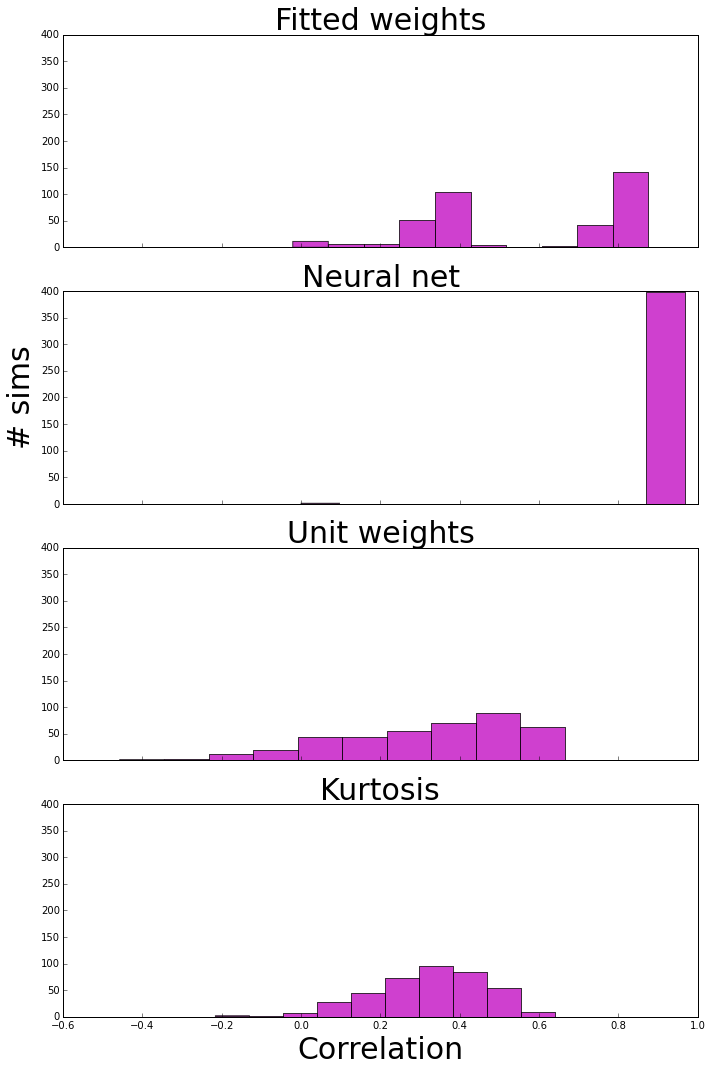

In [72]:
f, ax = plt.subplots(4, sharex=True, sharey=True)
ax[0].hist(lin_corrs[~np.isnan(lin_corrs)], 10, facecolor='m', alpha=0.75)
ax[1].hist(full_corrs[~np.isnan(full_corrs)], 10, facecolor='m', alpha=0.75)
ax[2].hist(sum_corrs[~np.isnan(sum_corrs)], 10, facecolor='m', alpha=0.75)
ax[3].hist(kurt_corrs[~np.isnan(sum_corrs)], 10, facecolor='m', alpha=0.75)
ax[1].set_ylabel('# sims', fontsize=30)
ax[3].set_xlabel('Correlation', fontsize=30)
ax[0].yaxis.set_ticks_position('left')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].set_title('Fitted weights', fontsize=30)
ax[1].yaxis.set_ticks_position('left')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].set_title('Neural net', fontsize=30)
ax[2].yaxis.set_ticks_position('left')
ax[2].xaxis.set_ticks_position('bottom')
ax[2].set_title('Unit weights', fontsize=30)
ax[3].yaxis.set_ticks_position('left')
ax[3].xaxis.set_ticks_position('bottom')
ax[3].set_title('Kurtosis', fontsize=30)
f.set_size_inches(10,15)
plt.tight_layout()

In [10]:
nns = {}
for i in range(400):
    file_name = 'output_nn_tests_2/nn_tests_2_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, _, _ = pickle.load(pkl_file)
        nns[i] = (nn, nnx, valid_mse)

In [11]:
posts = {}
testsets = {}
for s_i in range(31):
    file_name = 'output_post_2/post_2_' + str(s_i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        p, r, c, delta_s = pickle.load(pkl_file)
        posts[delta_s] = p
        testsets[delta_s] = r

In [12]:
nn, nnx, valid_mse = nns[43]
x = []
y = []
for s_i in range(31):
    x.append(dm.get_hu_responses(testsets[s_i], nn))
    y.append(np.array((1/posts[s_i]['var_s1'], 1/posts[s_i]['var_s2'])))
y = np.concatenate(y, axis=1).T
x = np.concatenate(x)
inds = range(len(x))
np.random.shuffle(inds)
x_shuf = x[inds]
y_shuf = y[inds]
validset = x_shuf[0:2000], y_shuf[0:2000]
trainset = x_shuf[2000:], y_shuf[2000:]

In [13]:
nn_post, nnx_post, valid_mse_post = dm.train_nn(trainset, valid_dataset=validset, n_in=20, learning_rate=0.00005, n_epochs=100, linear=True, rho=.9, mu=.99, nesterov=True)

[[ 1.         0.8420478]
 [ 0.8420478  1.       ]]


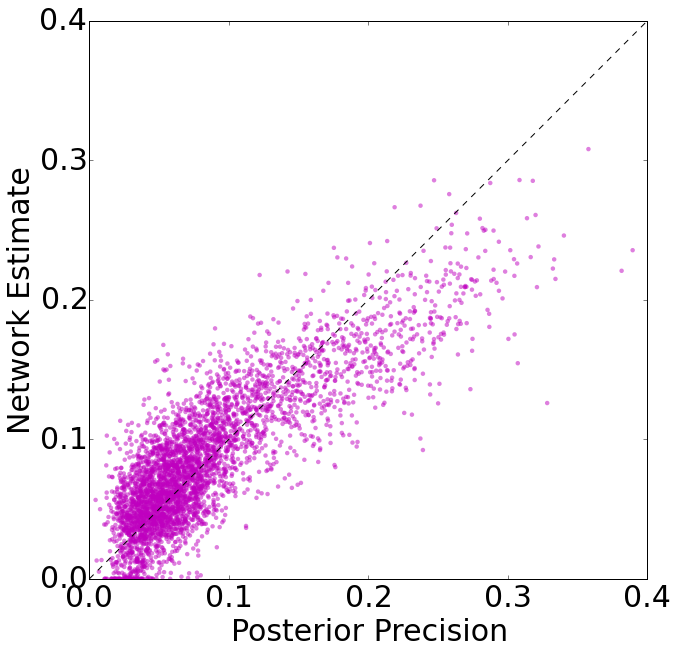

In [14]:
plt.rc('font', size=30)
hus, vpost = validset
nn_posts1 = dm.get_hu_responses(hus, nn_post)
vp = np.concatenate((vpost.T[0], vpost.T[1]))
np1 = np.concatenate((nn_posts1.T[0], nn_posts1.T[1]))
plt.figure(figsize=(10,10))
plt.scatter(vp, np1, c='m', alpha=.5, edgecolor="None")
plt.xlim(0, 0.4)
plt.ylim(0, 0.4)
plt.xlabel("Posterior Precision")
plt.ylabel("Network Estimate")
plt.locator_params(nbins=5)
plt.plot(range(2), '--', c='k')
print np.corrcoef(vp, np1)

In [15]:
c_arr = [[[1, 2, 4], [1, 2, 4]]]
s_arr = np.linspace(-60, 60, 120)
acts = dm.get_mean_acts(s_arr, nn, c_arr[0])  

50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per 

In [ ]:
sort_arr = np.argsort(nn_post.get_params()['W'][:, 0], axis=0)[::-1]
f, axarr = plt.subplots(4, 5)
for i in range(4):
    for j in range(5):
        ind = i * 5 + j
        sort_ind = sort_arr[ind]
        axarr[i,j].imshow(acts[:, :, sort_ind],  origin='lower', cmap='Greys', extent=(-60, 60, -60, 60), vmax=np.max(acts))
        axarr[i,j].yaxis.set_ticks_position('left')
        axarr[i,j].xaxis.set_ticks_position('bottom')
        axarr[i,j].set_title(nn_post.get_params()['W'][sort_ind][0])
axarr[2,0].set_ylabel("$s_1$", fontsize = 30)
axarr[3,2].set_xlabel("$s_2$", fontsize = 30)
f.set_size_inches(15,15)
plt.tight_layout()